# Car's speed prediction

In this project we will use optical flow to estimate speed of a car using front camera images. We will use nvidia model as our neural net and will train it from scratch. this work is mainly based on the followning work by Jonathan Mitchel. After training nvidia modek we will test other methods such as using vgg16 and transfer learning, 3d convolution(if my laptop help!), and recurrent convolutional neural network.
- https://github.com/JonathanCMitchell/speedChallenge


In [1]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from sklearn.utils import shuffle
import os

import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# img_path = []
# for i in range(20400):
#     img_path.append('data/IMG/'+str(i)+'.jpg')

In [3]:
# F = open('./data/train.txt', 'r')
# ground_truth = [x[:-2] for x in F.readlines()]
# print(len(ground_truth))

In [4]:
# time = np.arange(0, 1020, 0.05)
# time.shape

In [5]:
# df = pd.DataFrame({'image_path': img_path,
#                    'speed': ground_truth,
#                    'time': time})

In [6]:
# df

In [7]:
df = pd.read_csv('./test_suite/data/driving.csv')
df

,image_path,time,speed
0,./test_suite/data/IMG/0.0046617984771728516.jpg,0.004662,2.022715
1,./test_suite/data/IMG/0.06979799270629883.jpg,0.069798,2.040872
2,./test_suite/data/IMG/0.1299138069152832.jpg,0.129914,2.062394
3,./test_suite/data/IMG/0.22664284706115723.jpg,0.226643,2.076283
4,./test_suite/data/IMG/0.2913668155670166.jpg,0.291367,2.077074
5,./test_suite/data/IMG/0.34787487983703613.jpg,0.347875,2.070870
6,./test_suite/data/IMG/0.3938179016113281.jpg,0.393818,2.107572
7,./test_suite/data/IMG/0.461500883102417.jpg,0.461501,2.122324
8,./test_suite/data/IMG/0.5268487930297852.jpg,0.526849,2.127576
9,./test_suite/data/IMG/0.5937719345092773.jpg,0.593772,2.123339


shape of images: (480, 640, 3)


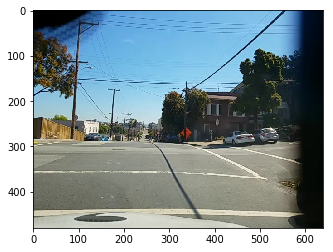

In [8]:
im =mpimg.imread(df['image_path'][0])
print('shape of images:', im.shape)
plt.imshow(im)

#### Plot Speeds vs Time

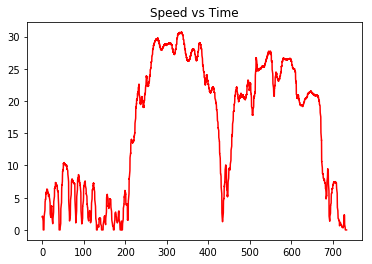

In [9]:
times = np.asarray(df['time'], dtype = np.float32)
speeds = np.asarray(df['speed'], dtype=np.float32)
plt.plot(times, speeds, 'r-')
plt.title('Speed vs Time')
plt.show()

### Shuffle Pairs and Train Test Split
* This function is a batch shuffler, 
* There is a 20% chance to add the row to validation data, other wise it will be train data

In [10]:
def batch_shuffle(dframe):
    """
    Randomly shuffle pairs of rows in the dataframe, separates train and validation data
    generates a uniform random variable 0->9, gives 20% chance to append to valid data, otherwise train_data
    return tuple (train_data, valid_data) dataframes
    """
    train_data = pd.DataFrame()
    valid_data = pd.DataFrame()
    for i in range(len(dframe) - 1):
        idx1 = np.random.randint(len(dframe) - 1)
        idx2 = idx1 + 1
        
        row1 = dframe.iloc[[idx1]].reset_index()
        row2 = dframe.iloc[[idx2]].reset_index()
        
        randInt = np.random.randint(9)
        if 0 <= randInt <= 1:
            valid_frames = [valid_data, row1, row2]
            valid_data = pd.concat(valid_frames, axis = 0, join = 'outer', ignore_index=False)
        if randInt >= 2:
            train_frames = [train_data, row1, row2]
            train_data = pd.concat(train_frames, axis = 0, join = 'outer', ignore_index=False)
    return train_data, valid_data


In [11]:
train_data, valid_data = batch_shuffle(df)

In [12]:
print('valid_data: ', len(valid_data))
print('train_data: ', len(train_data))

valid_data:  3808
train_data:  13422


In [13]:
train_data.head(5)

,index,image_path,time,speed
0,470,./test_suite/data/IMG/33.5816388130188.jpg,33.581639,7.162957
0,471,./test_suite/data/IMG/33.60333585739136.jpg,33.603336,7.175854
0,393,./test_suite/data/IMG/28.073031902313232.jpg,28.073032,4.453836
0,394,./test_suite/data/IMG/28.120678901672363.jpg,28.120679,4.468189
0,86,./test_suite/data/IMG/5.934640884399414.jpg,5.934641,2.724503


## Preprocess

In [14]:
def change_brightness(image, bright_factor):
    """
    Augments the brightness of the image by multiplying the saturation by a uniform random variable
    Input: image (RGB)
    returns: image with brightness augmentation
    """
    
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # perform brightness augmentation only on the second channel
    hsv_image[:,:,2] = hsv_image[:,:,2] * bright_factor
    
    # change back to RGB
    image_rgb = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    return image_rgb

### Optical Flow Dense
* Two strategies
* Strategy 1: get optical flow ang, magnitude, convert HSV to RGB and throw that image into the network
* Strategy 2: get optical flow ang, magnitude, convert HSV to RGB then overlay ontop of original image and throw that into the network as RGB
* Strategy 3: get optical flow parameters, ang, magnitude and expand dimensions of original image so you throw H x W x R x G x B x Ang x Magnitude into the network
* Strategy 4: send in the flow differences as RGB (applied here)

In [15]:
def opticalFlowDense(image_current, image_next):
    """
    input: image_current, image_next (RGB images)
    calculates optical flow magnitude and angle and places it into HSV image
    * Set the saturation to the saturation value of image_next
    * Set the hue to the angles returned from computing the flow params
    * set the value to the magnitude returned from computing the flow params
    * Convert from HSV to RGB and return RGB image with same size as original image
    """
    gray_current = cv2.cvtColor(image_current, cv2.COLOR_RGB2GRAY)
    gray_next = cv2.cvtColor(image_next, cv2.COLOR_RGB2GRAY)
    
    hsv = np.zeros((340, 550, 3))
    # set saturation
#     hsv[:,:,1] = cv2.cvtColor(image_next, cv2.COLOR_RGB2HSV)[:,:,1]
    
    # set saturation to 255
    hsv[:,:,1] = 255
 
    # Flow Parameters
#     flow_mat = cv2.CV_32FC2
    flow_mat = None
    image_scale = 0.5
    nb_images = 1
    win_size = 15
    nb_iterations = 2
    deg_expansion = 5
    STD = 1.3
    extra = 0

    # obtain dense optical flow paramters
    flow = cv2.calcOpticalFlowFarneback(gray_current, gray_next,  
                                        flow_mat, 
                                        image_scale, 
                                        nb_images, 
                                        win_size, 
                                        nb_iterations, 
                                        deg_expansion, 
                                        STD, 
                                        0)
                                        
        
    # convert from cartesian to polar
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])  
        
    # hue corresponds to direction
    hsv[:,:,0] = ang * (180/ np.pi / 2)
    
    # value corresponds to magnitude
    hsv[:,:,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    
    # convert HSV to float32's
    hsv = np.asarray(hsv, dtype= np.float32)
    rgb_flow = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

    
    return rgb_flow

### Expand dims to add optical flow

In [16]:
def preprocess_image(image):
    """
    preprocesses the image
    
    input: image (480 (y), 640 (x), 3) RGB
    output: image (shape is (220, 66, 3) as RGB)
    
    This stuff is performed on my validation data and my training data
    Process: 
             1) Cropping out black spots
             3) resize to (220, 66, 3) if not done so already from perspective transform
    """
    # Crop out sky (top) (100px) and black right part (-90px)
#     image_cropped = image[250:440, 100:-190] 
    image_cropped = image[100:440, :-90] # -> (340, 550, 3)
    image = cv2.resize(image_cropped, (220, 66), interpolation = cv2.INTER_AREA)
        
    return image_cropped

In [17]:
def preprocess_image_valid_from_path(image_path, speed):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = preprocess_image(img)
    return img, speed

In [18]:
def preprocess_image_from_path(image_path, speed, bright_factor):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = change_brightness(img, bright_factor)    
    img = preprocess_image(img)
    return img, speed

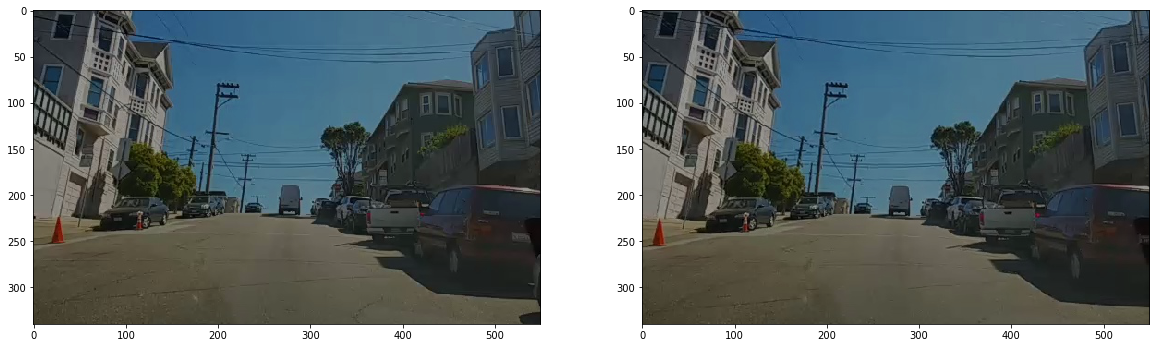

In [19]:
im1,_ = preprocess_image_from_path(df['image_path'][1000],df['speed'][1000], 0.6)
im2,_ = preprocess_image_from_path(df['image_path'][1001],df['speed'][1001], 0.6)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(im1)
plt.subplot(1,2,2)
plt.imshow(im2)

### Generators

#### Train Generator
* This is used to yield train batches of rgb_flow and average speed. 
* We pick a random spot in the training dataset, between 1 and length - 1
* determine the relationship between 3 frames
* locate the current_frame and the next_frame
* Take the rgb_flow and the average speed and build batches with that information
* Then shuffle the batch and yield it, which will then be fed into the network
* Generators allow me to not clog my memory stack so I can perform these operations on 16 (`BATCH` size) at a time. Note: We process 32 images each time the generator runs. If we run 8 epochs and 20480 samples per epoch we are processing 8 x 20480 x 32 = 5.2M images total.

In [20]:
def generate_training_data(data, batch_size = 32):
    image_batch = np.zeros((batch_size, 66, 220, 3)) # nvidia input params
    label_batch = np.zeros((batch_size))
    while True:
        for i in range(batch_size):
            # generate a random index with a uniform random distribution from 1 to len - 1
            idx = np.random.randint(1, len(data) - 1)
            
            
            # Generate a random bright factor to apply to both images
            bright_factor = 0.4 + np.random.uniform()   # 0.2
            
            row_now = data.iloc[[idx]].reset_index()
            row_prev = data.iloc[[idx - 1]].reset_index()
            row_next = data.iloc[[idx + 1]].reset_index()
            
            # Find the 3 respective times to determine frame order (current -> next)
            
            time_now = row_now['time'].values[0]
            time_prev = row_prev['time'].values[0]
            time_next = row_next['time'].values[0]
            
            if time_now - time_prev > 0 and 0.0000001 < time_now - time_prev < 0.58: # 0.578111 is highest diff i have seen
                # in this case row_prev is x1 and row_now is x2
                row1 = row_prev
                row2 = row_now
                
            elif time_next - time_now > 0 and 0.0000001 < time_next - time_now < 0.58:
                # in this case row_now is x1 and row_next is x2
                row1 = row_now
                row2 = row_next
                
                # Use this to find outliers
            else:
                print('time_now is not next or prev: ', time_now)
                print('time_prev is :', time_prev)
                print('time_next is: ', time_next)
                
                print('\n diff: now  - prev \t', time_now - time_prev)
                print('\n diff: next - now: \t', time_next - time_now)
            
            
            x1, y1 = preprocess_image_from_path(row1['image_path'].values[0],
                                                row1['speed'].values[0],
                                               bright_factor)
            
#             print(row1['image_path'].values[0], row1['speed'].values[0])
            
            # preprocess another image
            x2, y2 = preprocess_image_from_path(row2['image_path'].values[0], 
                                                row2['speed'].values[0],
                                               bright_factor)
            
#             print(row2['image_path'].values[0], row2['speed'].values[0])   
        
            # compute optical flow send in images as RGB
            rgb_diff = opticalFlowDense(x1, x2)
            
            rgb_diff_resized = cv2.resize(rgb_diff, (220, 66), interpolation = cv2.INTER_AREA)
                        
            # calculate mean speed
            y1 = float(y1)
            y2 = float(y2)
            y = np.mean([y1, y2])
            
            image_batch[i] = rgb_diff_resized
            label_batch[i] = y
            
        # Shuffle the pairs before they get fed into the network
        yield shuffle(image_batch, label_batch)

#### Validation Generator
* This is used to yield validation rgb_flow and average speed. 
* We pick iterate through the validation data, determine the relationship between 3 frames, locate the current_frame and the next_frame. Take the rgb_flow and their average speed and feed that into the network
* Reshape by adding an additional dimensions so the network perceives we are using a batch size of 1

In [21]:
def generate_validation_data(data):
    while True:
        for idx in range(1, len(data) - 1): # start from the second row because we may try to grab it and need its prev to be in bounds
            row_now = data.iloc[[idx]].reset_index()
            row_prev = data.iloc[[idx - 1]].reset_index()
            row_next = data.iloc[[idx + 1]].reset_index()
            
            # Find the 3 respective times to determine frame order (current -> next)
            
            time_now = row_now['time'].values[0]
            time_prev = row_prev['time'].values[0]
            time_next = row_next['time'].values[0]
            
            if time_now - time_prev > 0 and 0.0000001 < time_now - time_prev < 0.58:
                # in this case row_prev is x1 and row_now is x2
                row1 = row_prev
                row2 = row_now
                
            elif time_next - time_now > 0 and 0.000001 < time_next - time_now < 0.58:
                # in this case row_now is x1 and row_next is x2
                row1 = row_now
                row2 = row_next
            
            x1, y1 = preprocess_image_valid_from_path(row1['image_path'].values[0], row1['speed'].values[0])
            x2, y2 = preprocess_image_valid_from_path(row2['image_path'].values[0], row2['speed'].values[0])
            
            img_diff = opticalFlowDense(x1, x2)
            img_diff = cv2.resize(img_diff, (220, 66), interpolation = cv2.INTER_AREA)
            img_diff = img_diff.reshape(1, img_diff.shape[0], img_diff.shape[1], img_diff.shape[2])
#             img_diff = np.reshape(img_diff, (img_diff.shape[0], img_diff.shape[1], img_diff.shape[2]))
    
            y1 = float(y1)
            y2 = float(y2)
            y = np.mean([y1, y2])
            
            speed = np.array([[y]])
            yield img_diff, speed

### Nvidia Model

We will define nvidia model and train it from scratch.

In [22]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Activation, Dropout, Flatten, Dense, Lambda
from keras.layers import ELU
from keras.optimizers import Adam
import keras.backend.tensorflow_backend as KTF


Using TensorFlow backend.


In [23]:
N_img_height = 66
N_img_width = 220
N_img_channels = 3

def nvidia_model():
    inputShape = (N_img_height, N_img_width, N_img_channels)
    model = Sequential()
    model.add(Lambda(lambda x: x/ 127.5 - 1, input_shape = inputShape))
    model.add(Convolution2D(30, 5, 5, subsample=(2,2), border_mode = 'valid', init = 'he_normal', name = 'conv1', input_shape = inputShape))
    model.add(ELU())    
    model.add(Convolution2D(60, 5, 5, subsample=(2,2), border_mode = 'valid', init = 'he_normal', name = 'conv2'))
    model.add(ELU())    
    model.add(Convolution2D(120, 5, 5, subsample=(2,2), border_mode = 'valid', init = 'he_normal', name = 'conv3'))
    model.add(ELU())
    model.add(Dropout(0.5))
    model.add(Convolution2D(240, 3, 3, subsample = (1,1), border_mode = 'valid', init = 'he_normal', name = 'conv4'))
    model.add(ELU())              
    model.add(Convolution2D(480, 3, 3, subsample= (1,1), border_mode = 'valid', init = 'he_normal', name = 'conv5'))
    model.add(Flatten(name = 'flatten'))
    model.add(ELU())
    model.add(Dense(300, init = 'he_normal', name = 'fc1'))
    model.add(ELU())
    model.add(Dense(100, init = 'he_normal', name = 'fc2'))
    model.add(ELU())
    model.add(Dense(50, init = 'he_normal', name = 'fc3'))
    model.add(ELU())
    model.add(Dense(1, name = 'output', init = 'he_normal'))
    
    adam = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(optimizer = adam, loss = 'mse')
    return model

#### Define training parameters

In [24]:
valid_data.shape

(3808, 4)

In [25]:
val_size = len(valid_data.index)
valid_generator = generate_validation_data(valid_data)
BATCH = 32
print('val_size: ', val_size)

val_size:  3808


#### Define model and train

In [26]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
filepath = 'nvidia_model_weights.h5'
earlyStopping = EarlyStopping(monitor='val_loss', 
                              patience=1, 
                              verbose=1, 
                              min_delta = 0.0000000002,
                              mode='min')
modelCheckpoint = ModelCheckpoint(filepath, 
                                  monitor = 'val_loss', 
                                  save_best_only = True, 
                                  mode = 'min', 
                                  verbose = 1,
                                 save_weights_only = True)
callbacks_list = [modelCheckpoint]

In [27]:
model = nvidia_model()
train_size = len(train_data.index)
train_generator = generate_training_data(train_data, BATCH)

In [ ]:
history = model.fit_generator(train_generator,
                              samples_per_epoch = train_data.shape[0],
                              nb_epoch = 200, 
                              callbacks = callbacks_list,
                              verbose = 1,
                              validation_data = valid_generator,
                              nb_val_samples = valid_data.shape[0])

print(history)

Epoch 1/200
13408/13422 [============================>.] - ETA: 1s - loss: 315.2769

C:\Users\Isaac\Documents\miniconda3\envs\carnd-term1\lib\site-packages\keras\engine\training.py:1569: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


Epoch 00000: val_loss improved from inf to 160.71412, saving model to nvidia_model_weights.h5
13440/13422 [==============================] - 1239s - loss: 314.9385 - val_loss: 160.7141
Epoch 2/200
13440/13422 [==============================] - 1197s - loss: 132.2070 - val_loss: 129.5032
Epoch 3/200
13440/13422 [==============================] - 1159s - loss: 103.0493 - val_loss: 108.3527
Epoch 4/200
13440/13422 [==============================] - 1145s - loss: 84.5981 - val_loss: 107.1929
Epoch 5/200
13440/13422 [==============================] - 1127s - loss: 76.0160 - val_loss: 83.0432
Epoch 6/200
13440/13422 [==============================] - 1128s - loss: 67.1088 - val_loss: 81.5759
Epoch 7/200
13440/13422 [==============================] - 1129s - loss: 60.0663 - val_loss: 71.9685
Epoch 8/200
13440/13422 [==============================] - 1128s - loss: 53.3140 - val_loss: 62.5654
Epoch 9/200
13440/13422 [==============================] - 1128s - loss: 46.1205 - val_loss: 61.1097
Ep

13440/13422 [==============================] - 1195s - loss: 8.1763 - val_loss: 6.5843
Epoch 33/200
13440/13422 [==============================] - 1253s - loss: 7.7093 - val_loss: 6.8015
Epoch 34/200
13440/13422 [==============================] - 1118s - loss: 7.3791 - val_loss: 7.5955
Epoch 35/200
13440/13422 [==============================] - 1113s - loss: 6.7016 - val_loss: 6.3169
Epoch 36/200
13440/13422 [==============================] - 1112s - loss: 6.5451 - val_loss: 6.9925
Epoch 37/200
13440/13422 [==============================] - 1110s - loss: 6.3593 - val_loss: 5.9650
Epoch 38/200
13440/13422 [==============================] - 1113s - loss: 5.9271 - val_loss: 7.1555
Epoch 39/200
13440/13422 [==============================] - 1111s - loss: 5.6968 - val_loss: 6.0373
Epoch 40/200
13440/13422 [==============================] - 1110s - loss: 5.3175 - val_loss: 6.4452
Epoch 41/200
13440/13422 [==============================] - 1111s - loss: 5.2215 - val_loss: 5.7065
Epoch 42/200


dict_keys(['val_loss', 'loss'])


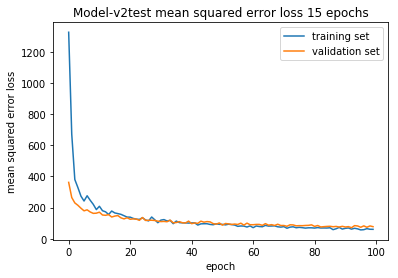

In [41]:
print(history.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model-v2test mean squared error loss 15 epochs')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()